In [1]:
import pandas as pd

In [7]:
locust_df = pd.read_csv(
    './report/1713409534/locust-stats-1000rps-50msz.csv_stats_history.csv',
    on_bad_lines='skip'
    )

In [8]:
locust_df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,1713409535,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,1713409537,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,1713409538,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,1713409539,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,1713409540,0.0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1713410134,50.0,NaN,Aggregated,5003.6,0.0,88.0,120.0,150.0,160.0,...,500.0,660.0,1100.0,2916355.0,0.0,88.0,104.624812,3.0,1063.0,15469.935669
568,1713410135,50.0,NaN,Aggregated,5003.6,0.0,88.0,120.0,150.0,160.0,...,500.0,660.0,1100.0,2916355.0,0.0,88.0,104.624812,3.0,1063.0,15469.935669
569,1713410136,50.0,NaN,Aggregated,4997.9,0.0,88.0,120.0,150.0,160.0,...,500.0,660.0,1100.0,2928645.0,0.0,88.0,104.564076,3.0,1063.0,15469.934939
570,1713410137,0.0,NaN,Aggregated,4994.6,0.0,88.0,120.0,150.0,160.0,...,500.0,660.0,1100.0,2931236.0,0.0,88.0,104.552040,3.0,1063.0,15469.934341


In [13]:
locust_df['Timestamp']

0      1713409535
1      1713409537
2      1713409538
3      1713409539
4      1713409540
          ...    
567    1713410134
568    1713410135
569    1713410136
570    1713410137
571    1713410138
Name: Timestamp, Length: 572, dtype: uint64

In [21]:
locust_df['95%'][100:].max()

480.0

In [17]:
import numpy as np
# Calculate the z-scores for 'Timestamp' and '95%'
z_scores_timestamp = np.abs((locust_df['Timestamp'] - locust_df['Timestamp'].mean()) / locust_df['Timestamp'].std())
z_scores_95 = np.abs((locust_df['95%'] - locust_df['95%'].mean()) / locust_df['95%'].std())

# Set the threshold for outlier detection
threshold = 3

# Prune outliers from 'Timestamp' and '95%'
locust_df = locust_df[(z_scores_timestamp <= threshold) & (z_scores_95 <= threshold)]

# Ensure 'Timestamp' and '95%' have the same length after pruning
min_length = min(len(locust_df['Timestamp']), len(locust_df['95%']))
locust_df = locust_df[:min_length]


In [32]:
locust_df = locust_df[locust_df['Timestamp'].astype(str).str.len() == 10]

In [34]:
locust_df['Timestamp'].sort_values()

9      1713409545
13     1713409549
15     1713409551
16     1713409552
17     1713409553
          ...    
567    1713410134
568    1713410135
569    1713410136
570    1713410137
571    1713410138
Name: Timestamp, Length: 525, dtype: uint64

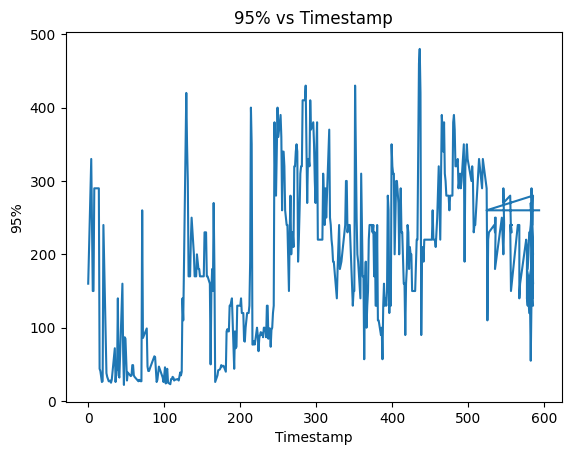

In [36]:
import matplotlib.pyplot as plt

plt.plot(locust_df['Timestamp'] - locust_df['Timestamp'].min(), locust_df['95%'])
plt.xlabel('Timestamp')
plt.ylabel('95%')
plt.title('95% vs Timestamp')
plt.show()
